In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('avg_by_game')

In [3]:
df.head()

,Unnamed: 0,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas)
0,2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,...,71.8,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5
1,2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,...,58.3,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0
2,2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,...,59.5,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5
3,2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,...,47.4,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5
4,2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,...,60.0,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5


In [4]:
data = df.set_index(df['Unnamed: 0'], drop=True)
data.index.rename('GameID', inplace=True)
data.drop(columns='Unnamed: 0', inplace=True)


In [5]:
data.head()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas)
GameID,,,,,,,,,,,,,,,,,,,,,
2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,15.2,...,71.8,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5
2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,16.7,...,58.3,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0
2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,14.7,...,59.5,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5
2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,15.2,...,47.4,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5
2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,16.1,...,60.0,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5


In [6]:
y = data['Home Win By']
x = data.drop(columns='Home Win By')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
model = models.Sequential()

In [8]:
model.add(Dense(500, input_dim=29, activation= 'relu'))
model.add(Dense(250, activation= 'relu'))
model.add(Dense(125, activation= 'relu'))

model.add(Dense(1, activation='linear'))

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               15000     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 171,751
Trainable params: 171,751
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=200, verbose=2, batch_size=300, validation_data=(x_test, y_test))

Epoch 1/200
30/30 - 2s - loss: 269.2266 - mean_squared_error: 269.2266 - val_loss: 157.0297 - val_mean_squared_error: 157.0297
Epoch 2/200
30/30 - 0s - loss: 154.2627 - mean_squared_error: 154.2627 - val_loss: 129.5515 - val_mean_squared_error: 129.5515
Epoch 3/200
30/30 - 0s - loss: 137.2643 - mean_squared_error: 137.2643 - val_loss: 126.1441 - val_mean_squared_error: 126.1441
Epoch 4/200
30/30 - 0s - loss: 133.1625 - mean_squared_error: 133.1625 - val_loss: 122.7197 - val_mean_squared_error: 122.7197
Epoch 5/200
30/30 - 0s - loss: 135.2596 - mean_squared_error: 135.2596 - val_loss: 154.2074 - val_mean_squared_error: 154.2073
Epoch 6/200
30/30 - 0s - loss: 133.7220 - mean_squared_error: 133.7220 - val_loss: 121.8045 - val_mean_squared_error: 121.8045
Epoch 7/200
30/30 - 0s - loss: 138.0876 - mean_squared_error: 138.0876 - val_loss: 128.3983 - val_mean_squared_error: 128.3983
Epoch 8/200
30/30 - 0s - loss: 130.4250 - mean_squared_error: 130.4250 - val_loss: 123.6775 - val_mean_squared_

30/30 - 0s - loss: 127.7296 - mean_squared_error: 127.7296 - val_loss: 143.0906 - val_mean_squared_error: 143.0906
Epoch 66/200
30/30 - 0s - loss: 133.2581 - mean_squared_error: 133.2581 - val_loss: 127.0965 - val_mean_squared_error: 127.0965
Epoch 67/200
30/30 - 0s - loss: 127.4481 - mean_squared_error: 127.4481 - val_loss: 120.4970 - val_mean_squared_error: 120.4970
Epoch 68/200
30/30 - 0s - loss: 129.6399 - mean_squared_error: 129.6399 - val_loss: 120.8589 - val_mean_squared_error: 120.8589
Epoch 69/200
30/30 - 0s - loss: 127.3548 - mean_squared_error: 127.3548 - val_loss: 122.0189 - val_mean_squared_error: 122.0189
Epoch 70/200
30/30 - 0s - loss: 130.9950 - mean_squared_error: 130.9950 - val_loss: 126.0808 - val_mean_squared_error: 126.0808
Epoch 71/200
30/30 - 0s - loss: 129.5025 - mean_squared_error: 129.5025 - val_loss: 127.1425 - val_mean_squared_error: 127.1425
Epoch 72/200
30/30 - 0s - loss: 128.7897 - mean_squared_error: 128.7897 - val_loss: 121.4429 - val_mean_squared_error

Epoch 129/200
30/30 - 0s - loss: 125.8933 - mean_squared_error: 125.8933 - val_loss: 123.0656 - val_mean_squared_error: 123.0656
Epoch 130/200
30/30 - 0s - loss: 127.0285 - mean_squared_error: 127.0285 - val_loss: 120.6661 - val_mean_squared_error: 120.6661
Epoch 131/200
30/30 - 0s - loss: 125.5182 - mean_squared_error: 125.5182 - val_loss: 120.4150 - val_mean_squared_error: 120.4150
Epoch 132/200
30/30 - 0s - loss: 125.9859 - mean_squared_error: 125.9859 - val_loss: 126.8803 - val_mean_squared_error: 126.8803
Epoch 133/200
30/30 - 0s - loss: 126.8872 - mean_squared_error: 126.8872 - val_loss: 120.8557 - val_mean_squared_error: 120.8557
Epoch 134/200
30/30 - 0s - loss: 125.8083 - mean_squared_error: 125.8083 - val_loss: 125.6367 - val_mean_squared_error: 125.6367
Epoch 135/200
30/30 - 0s - loss: 127.0267 - mean_squared_error: 127.0267 - val_loss: 120.9574 - val_mean_squared_error: 120.9574
Epoch 136/200
30/30 - 0s - loss: 125.7621 - mean_squared_error: 125.7621 - val_loss: 120.8608 - v

Epoch 193/200
30/30 - 0s - loss: 125.9307 - mean_squared_error: 125.9307 - val_loss: 125.7489 - val_mean_squared_error: 125.7489
Epoch 194/200
30/30 - 0s - loss: 126.1020 - mean_squared_error: 126.1020 - val_loss: 123.7221 - val_mean_squared_error: 123.7221
Epoch 195/200
30/30 - 0s - loss: 126.1200 - mean_squared_error: 126.1200 - val_loss: 122.9299 - val_mean_squared_error: 122.9299
Epoch 196/200
30/30 - 0s - loss: 126.0982 - mean_squared_error: 126.0982 - val_loss: 121.0857 - val_mean_squared_error: 121.0857
Epoch 197/200
30/30 - 0s - loss: 125.9520 - mean_squared_error: 125.9520 - val_loss: 132.2840 - val_mean_squared_error: 132.2840
Epoch 198/200
30/30 - 0s - loss: 128.4034 - mean_squared_error: 128.4034 - val_loss: 125.6797 - val_mean_squared_error: 125.6797
Epoch 199/200
30/30 - 0s - loss: 124.8885 - mean_squared_error: 124.8885 - val_loss: 121.2363 - val_mean_squared_error: 121.2363
Epoch 200/200
30/30 - 0s - loss: 124.6680 - mean_squared_error: 124.6680 - val_loss: 123.7794 - v

<ipython-input-12-e4f85823ae43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


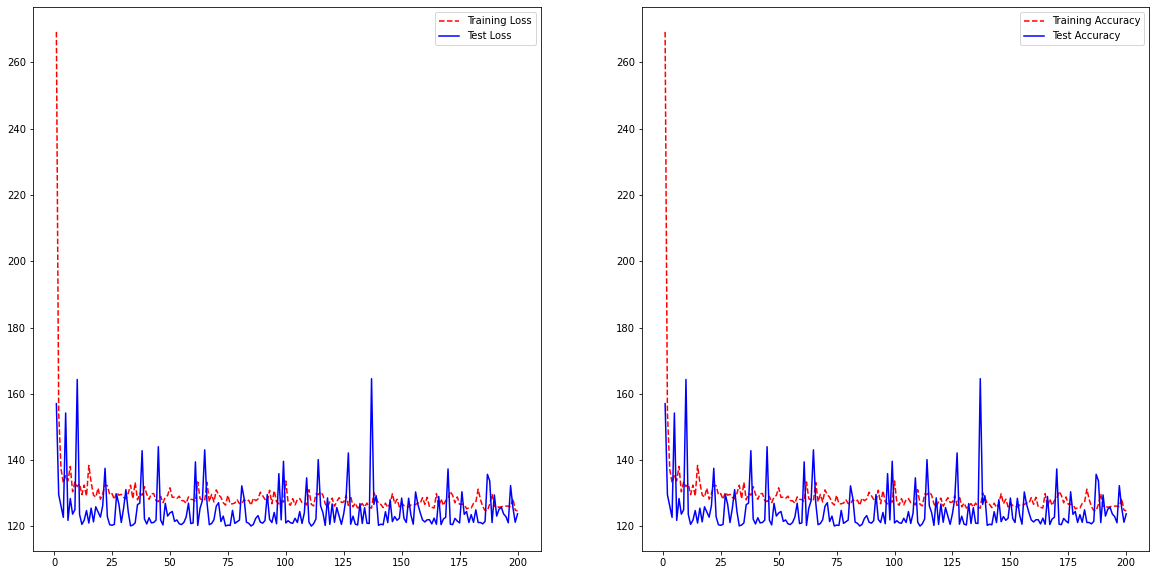

In [12]:
# Get training and test loss/accuracy histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['mean_squared_error']
test_acc = history.history['val_mean_squared_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])

fig.show();

In [13]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

In [14]:
print('Training RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_train, train_preds)**0.5))
print('Testing RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_test, test_preds)**0.5))

Training RMSE for neural networks baseline model: 11.34528536064441
Testing RMSE for neural networks baseline model: 11.125617365450738


In [15]:
def beat_vegas(result, vegas, prediction):
    tie = 0
    games = 0
    wins = 0
    win_total = 0
    loss = 0
    loss_total = 0
    
    for i in range(len(result)):
        if ((result[i]>vegas[i]) & (prediction[i]>vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif ((result[i]<vegas[i]) & (prediction[i]<vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif (result[i]==vegas[i]):
            tie += 1
            
        else:
            loss += 1
            games += 1
            loss_total += abs(vegas[i]-prediction[i])
            
    win_rate = (wins/games)*100
    win_distance = win_total/wins
    loss_distance = loss_total/loss
    
    print('Beat Vegas {}% of the time'.format(win_rate))
    print('Vegas RMSE: {}'.format(mean_squared_error(result, vegas)**0.5))
    print('Our RMSE: {}'.format(mean_squared_error(result, prediction)**0.5))
    print('When we beat Vegas, our prediction is {} points away from the Vegas spread.'.format(win_distance))
    print('When we lose to Vegas, our prediction is {} points away from the Vegas spread.'.format(loss_distance))

In [16]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], test_preds)

Beat Vegas 62.04124432016778% of the time
Vegas RMSE: 11.947860590231057
Our RMSE: 11.125617365450738
When we beat Vegas, our prediction is [4.6302004] points away from the Vegas spread.
When we lose to Vegas, our prediction is [3.1199627] points away from the Vegas spread.


In [17]:
test_preds

array([[ 3.7564502 ],
       [16.615957  ],
       [22.957123  ],
       ...,
       [-0.67246634],
       [13.152161  ],
       [-9.639678  ]], dtype=float32)

In [23]:
preds =  pd.DataFrame(test_preds, index=x_test.index)

In [26]:
preds.columns=['NN Predictions']

In [29]:
train_preds =  pd.DataFrame(train_preds, index=x_train.index)
train_preds.columns=['NN Training Prediction']

In [30]:
# preds.to_csv('NN Preds')
train_preds.to_csv('NN Train Prediction')